In [2]:
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
rs = np.random.RandomState(10)

In [3]:
user_df=pd.read_csv('train_user.csv')
def get_date(time):
    date,hour=time.split(" ")
    return date
def get_hour(time):
    date,hour=time.split(" ")
    return hour
user_df['date'] = user_df['time'].map(get_date)
user_df['date'] = pd.to_datetime(user_df['date'])
user_df['hour'] = user_df['time'].map(get_hour)
user_df['hour'] = user_df['hour'].astype(int)
behavior_type_dummies=pd.get_dummies(user_df['behavior_type'])
behavior_type_dummies.columns=['view','favor','addcar','buy']
user_df.drop(['behavior_type','time','user_geohash'],axis=1,inplace=True)
user_df=user_df.join(behavior_type_dummies)
user_df.head()

,user_id,item_id,item_category,date,hour,view,favor,addcar,buy
0,10001082,285259775,4076,2014-12-08,18,1,0,0,0
1,10001082,4368907,5503,2014-12-12,12,1,0,0,0
2,10001082,4368907,5503,2014-12-12,12,1,0,0,0
3,10001082,53616768,9762,2014-12-02,15,1,0,0,0
4,10001082,151466952,5232,2014-12-12,11,1,0,0,0


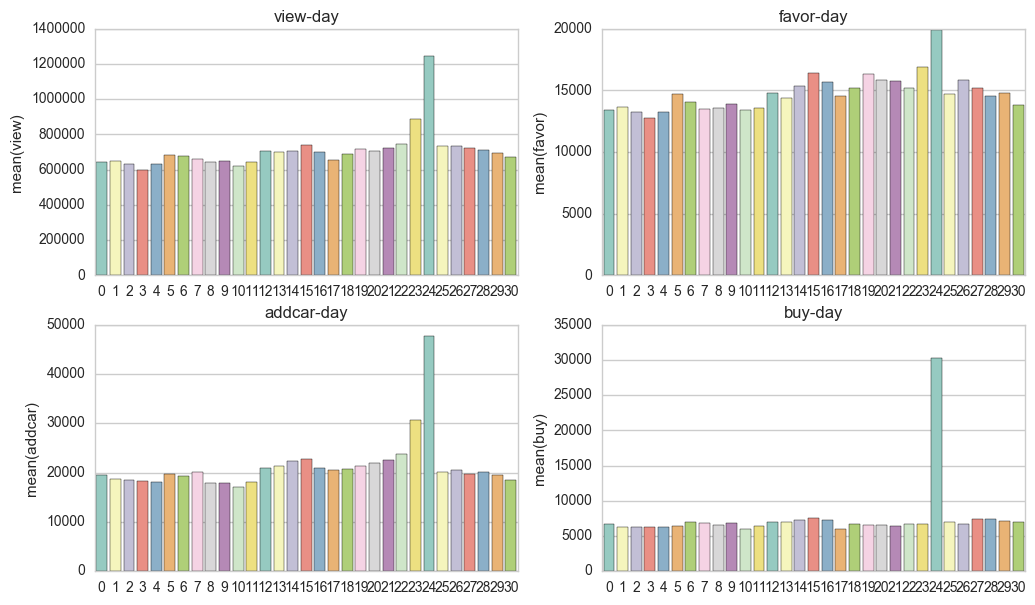

In [4]:
#绘制这个月内每一天所有互动类型的总量
month_total=user_df[['view','favor','addcar','buy','date']].groupby('date',as_index=False).sum()
f,axes=plt.subplots(2,2,figsize=(12,7))
axes[0,0].set_title("view-day")
axes[0,1].set_title("favor-day")
axes[1,0].set_title("addcar-day")
axes[1,1].set_title("buy-day")
sns.barplot(month_total.index, month_total.view,palette="Set3",ax=axes[0,0])
sns.barplot(month_total.index, month_total.favor,palette="Set3",ax=axes[0,1])
sns.barplot(month_total.index, month_total.addcar,palette="Set3",ax=axes[1,0])
sns.barplot(month_total.index, month_total.buy,palette="Set3",ax=axes[1,1])

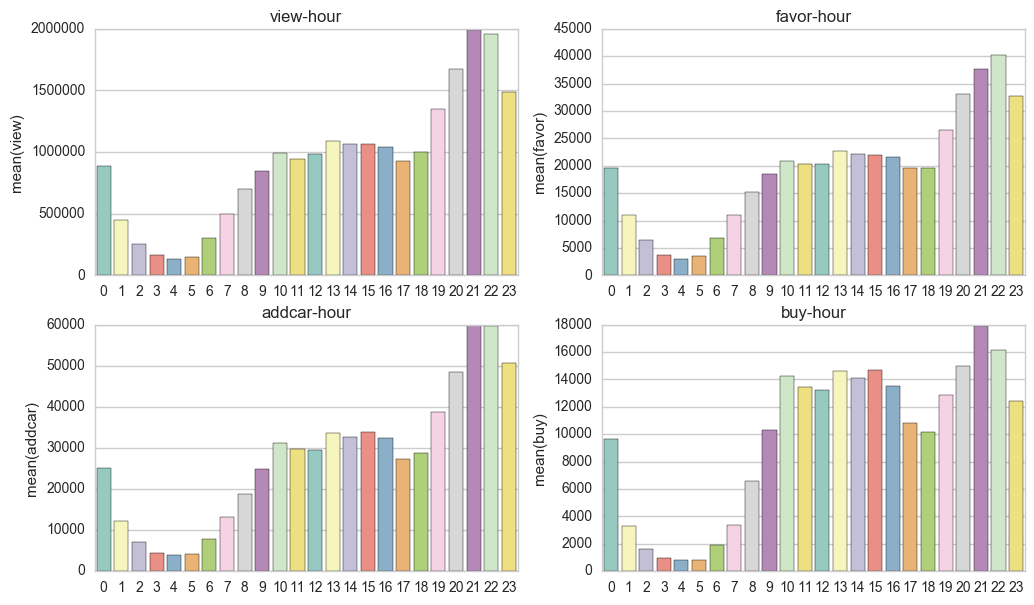

In [5]:
#绘制这个月内所有天的按小时时段统计的互动类型总量
day_detail=user_df[['view','favor','addcar','buy','hour']].groupby('hour',as_index=False).sum()
f,axes=plt.subplots(2,2,figsize=(12,7))
axes[0,0].set_title("view-hour")
axes[0,1].set_title("favor-hour")
axes[1,0].set_title("addcar-hour")
axes[1,1].set_title("buy-hour")
sns.barplot(day_detail.index, day_detail.view,palette="Set3",ax=axes[0,0])
sns.barplot(day_detail.index, day_detail.favor,palette="Set3",ax=axes[0,1])
sns.barplot(day_detail.index, day_detail.addcar,palette="Set3",ax=axes[1,0])
sns.barplot(day_detail.index, day_detail.buy,palette="Set3",ax=axes[1,1])

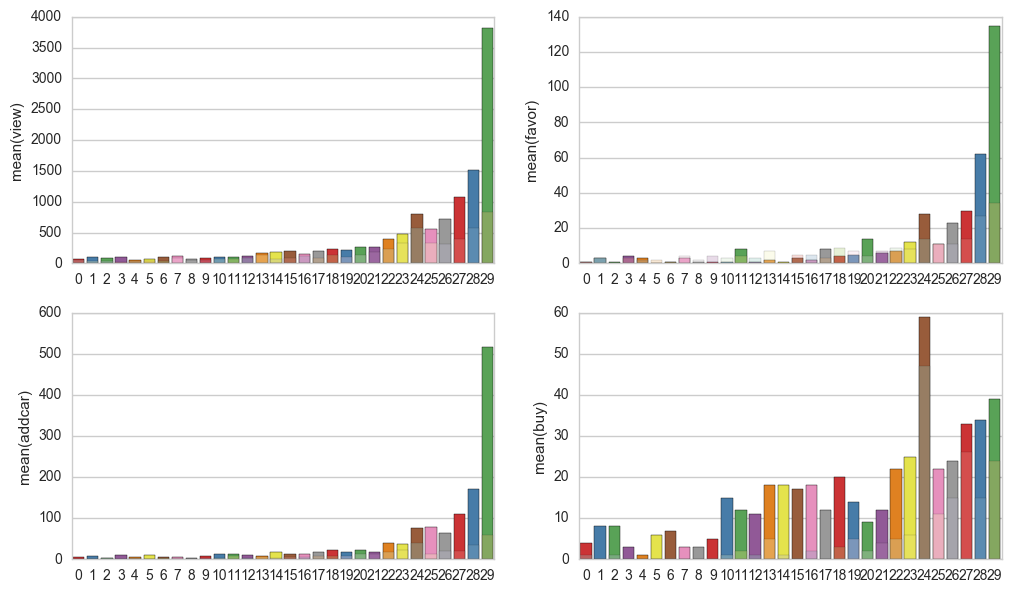

In [6]:
month_detail=user_df[['user_id','item_id','date','view','favor','addcar','buy']].groupby(['user_id','item_id','date'],as_index=False).sum()
day18_positive=month_detail[['user_id','item_id']][(month_detail.date=='2014-12-18')&(month_detail.buy!=0)]
day18_negative=month_detail[['user_id','item_id']][(month_detail.date=='2014-12-18')&(month_detail.buy==0)].sample(n=6124)

day18_buy_1month_detail=day18_positive.merge(month_detail,how='left',on=['user_id','item_id'],).groupby('date',as_index=False).sum()
day18_notbuy_1month_detail=day18_negative.merge(month_detail,how='left',on=['user_id','item_id'],).groupby('date',as_index=False).sum()
#去除18号的数据
day18_buy_1month_detail=day18_buy_1month_detail.drop(30)
day18_notbuy_1month_detail=day18_notbuy_1month_detail.drop(30)

f,axes=plt.subplots(2,2,figsize=(12,7))
sns.barplot(day18_buy_1month_detail.index, day18_buy_1month_detail.view,palette="Set1",ax=axes[0,0])
sns.barplot(day18_notbuy_1month_detail.index, day18_notbuy_1month_detail.view,palette="Set3",ax=axes[0,0],alpha=.3)
sns.barplot(day18_buy_1month_detail.index, day18_buy_1month_detail.favor,palette="Set1",ax=axes[0,1])
sns.barplot(day18_notbuy_1month_detail.index, day18_notbuy_1month_detail.favor,palette="Set3",ax=axes[0,1],alpha=.3)
sns.barplot(day18_buy_1month_detail.index, day18_buy_1month_detail.addcar,palette="Set1",ax=axes[1,0])
sns.barplot(day18_notbuy_1month_detail.index, day18_notbuy_1month_detail.addcar,palette="Set3",ax=axes[1,0],alpha=.3)
sns.barplot(day18_buy_1month_detail.index, day18_buy_1month_detail.buy,palette="Set1",ax=axes[1,1])
sns.barplot(day18_notbuy_1month_detail.index, day18_notbuy_1month_detail.buy,palette="Set3",ax=axes[1,1],alpha=.3)

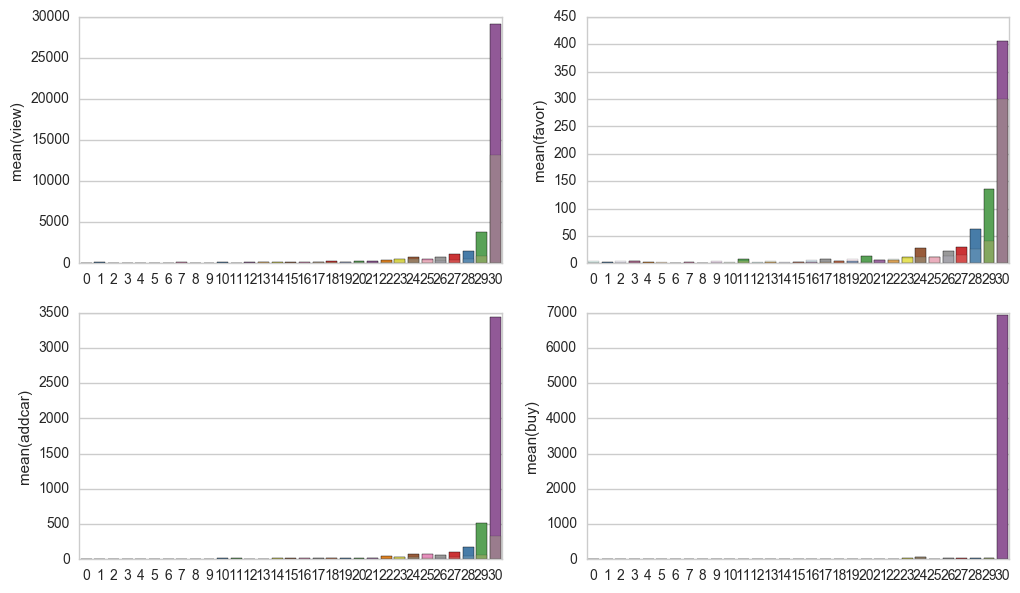

In [7]:
#作为对比，可以看看不去除12月18号的数据的情况
month_detail=user_df[['user_id','item_id','date','view','favor','addcar','buy']].groupby(['user_id','item_id','date'],as_index=False).sum()
day18_positive=month_detail[['user_id','item_id']][(month_detail.date=='2014-12-18')&(month_detail.buy!=0)]
day18_negative=month_detail[['user_id','item_id']][(month_detail.date=='2014-12-18')&(month_detail.buy==0)].sample(n=6124)

day18_buy_1month_detail=day18_positive.merge(month_detail,how='left',on=['user_id','item_id'],).groupby('date',as_index=False).sum()
day18_notbuy_1month_detail=day18_negative.merge(month_detail,how='left',on=['user_id','item_id'],).groupby('date',as_index=False).sum()

f,axes=plt.subplots(2,2,figsize=(12,7))
sns.barplot(day18_buy_1month_detail.index, day18_buy_1month_detail.view,palette="Set1",ax=axes[0,0])
sns.barplot(day18_notbuy_1month_detail.index, day18_notbuy_1month_detail.view,palette="Set3",ax=axes[0,0],alpha=.3)
sns.barplot(day18_buy_1month_detail.index, day18_buy_1month_detail.favor,palette="Set1",ax=axes[0,1])
sns.barplot(day18_notbuy_1month_detail.index, day18_notbuy_1month_detail.favor,palette="Set3",ax=axes[0,1],alpha=.3)
sns.barplot(day18_buy_1month_detail.index, day18_buy_1month_detail.addcar,palette="Set1",ax=axes[1,0])
sns.barplot(day18_notbuy_1month_detail.index, day18_notbuy_1month_detail.addcar,palette="Set3",ax=axes[1,0],alpha=.3)
sns.barplot(day18_buy_1month_detail.index, day18_buy_1month_detail.buy,palette="Set1",ax=axes[1,1])
sns.barplot(day18_notbuy_1month_detail.index, day18_notbuy_1month_detail.buy,palette="Set3",ax=axes[1,1],alpha=.3)

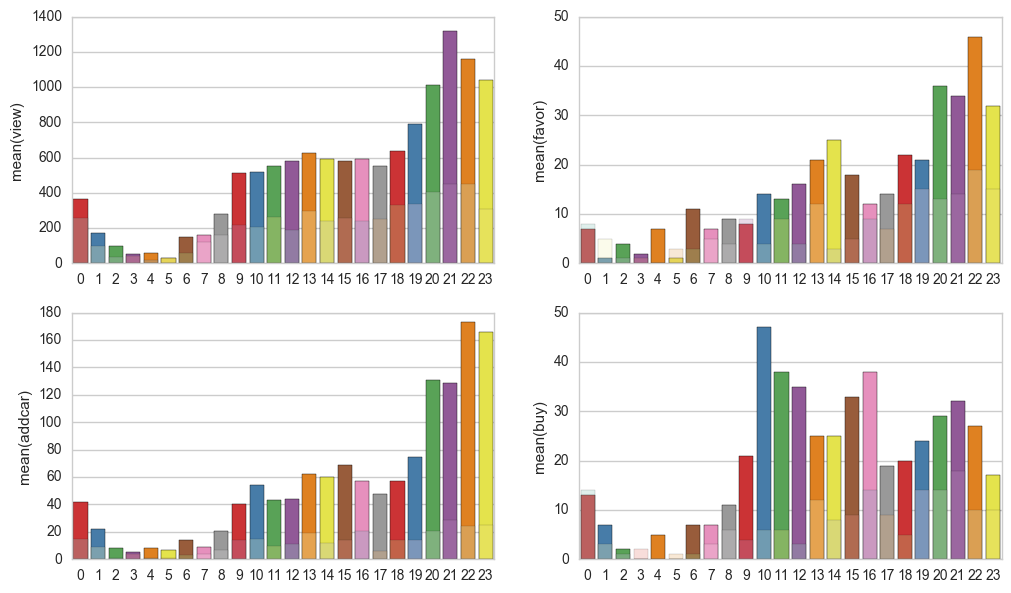

In [8]:
hour_detail=user_df[['user_id','item_id','hour','view','favor','addcar','buy']][user_df.date<'2014-12-18'].groupby(['user_id','item_id','hour'],as_index=False).sum()
month_detail=user_df[['user_id','item_id','date','view','favor','addcar','buy']].groupby(['user_id','item_id','date'],as_index=False).sum()
day18_positive=month_detail[['user_id','item_id']][(month_detail.date=='2014-12-18')&(month_detail.buy!=0)]
day18_negative=month_detail[['user_id','item_id']][(month_detail.date=='2014-12-18')&(month_detail.buy==0)].sample(n=6124)
day18_buy_hour_detail=day18_positive.merge(hour_detail,how='left',on=['user_id','item_id'],).groupby('hour',as_index=False).sum()
day18_notbuy_hour_detail=day18_negative.merge(hour_detail,how='left',on=['user_id','item_id'],).groupby('hour',as_index=False).sum()

f,axes=plt.subplots(2,2,figsize=(12,7))
sns.barplot(day18_buy_hour_detail.index, day18_buy_hour_detail.view,palette="Set1",ax=axes[0,0])
sns.barplot(day18_notbuy_hour_detail.index, day18_notbuy_hour_detail.view,palette="Set3",ax=axes[0,0],alpha=.3)
sns.barplot(day18_buy_hour_detail.index, day18_buy_hour_detail.favor,palette="Set1",ax=axes[0,1])
sns.barplot(day18_notbuy_hour_detail.index, day18_notbuy_hour_detail.favor,palette="Set3",ax=axes[0,1],alpha=.3)
sns.barplot(day18_buy_hour_detail.index, day18_buy_hour_detail.addcar,palette="Set1",ax=axes[1,0])
sns.barplot(day18_notbuy_hour_detail.index, day18_notbuy_hour_detail.addcar,palette="Set3",ax=axes[1,0],alpha=.3)
sns.barplot(day18_buy_hour_detail.index, day18_buy_hour_detail.buy,palette="Set1",ax=axes[1,1])
sns.barplot(day18_notbuy_hour_detail.index, day18_notbuy_hour_detail.buy,palette="Set3",ax=axes[1,1],alpha=.3)